Assignment:2                  Independent Component Analysis
 
Vivek Khetan
UT-EID: vkk287

----- steps to take:
	- read all your file
	- define different source, mixer and separator matrix
	- define n and no of iterations
	- write the function with default source and mixer file
	- check the output, test with various other values
	- obtain your source sounds from mixed noise
	- plot (actual source, mixed sound and separated sound) for each of the source
-------

In [1]:
# Let's import all the required packages
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


In [2]:
# Let's Read the Sound files

icaTest = scipy.io.loadmat('icaTest.mat')

Utest = icaTest['U'] # source
Atest = icaTest['A'] # Mixer
Mtest = np.matmul(Atest, Utest) #mixed sound
Wtest = np.random.rand(Utest.shape[0],Utest.shape[0])
#print("Wtest" + str(Wtest))



In [3]:

# let's write a function that will give us the optimal
# separato matrix W
def grad(sep, mix, alpha , iters ):
    for i in range(0,iters):
        #for j in range(i):
        #sep = ftr*sep
        Y = np.matmul(sep, mix) # distinct sounnds sources
        Z = 1/(1+np.exp((-1*Y)))
        I = np.identity(sep.shape[0])
        dW = alpha*(I + (np.matmul((1-(2*Z)), Y.T)))
        #print(type(dW), type(sep))
        sep += dW
            #print(sep)
    print('\nFor aplha:'+str(alpha) + ' iteration:'+str(iters) + ' separator:'+ str(sep.flatten()))
    Y = np.matmul(sep, mix)
        #print('\nFinal seprator matrix: ')
    return Y

In [4]:
# Let's test our function for various sounds

original_sound = Utest
recovered_sound = grad(Wtest*0.1, Mtest, 0.01, 100000)
#print('\norigianl_source: ' +str(original_sound))
#print('\nrecovered_source: ' +str(recovered_sound))




For aplha:0.01 iteration:100000 separator:[ 2.4560469  -0.32142757 -1.20034157  0.8025002   0.6041202  -1.57402047
 -3.64477744  0.15725769  3.02437294]


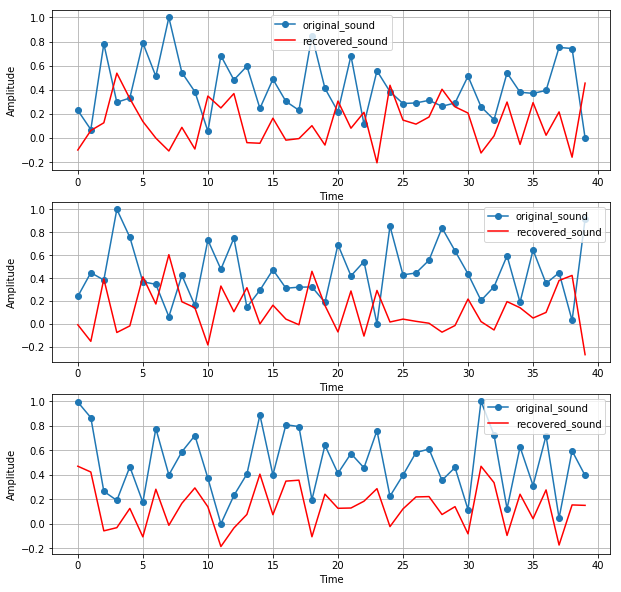

In [5]:
# Let's make some awesome plots 
# for the given test sound matrix: having three sound sources
fig = plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(original_sound[0,:], 'o-', label = 'original_sound')
plt.plot(recovered_sound[0,:], 'r-', label = 'recovered_sound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(312)
plt.plot(original_sound[1,:], 'o-', label = 'original_sound')
plt.plot(recovered_sound[1,:], 'r-', label = 'recovered_sound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(313)
plt.plot(original_sound[2,:], 'o-', label = 'original_sound')
plt.plot(recovered_sound[2,:], 'r-', label = 'recovered_sound')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.savefig('plot1.png', dpi = 100)
plt.show()

It's calearly evident that second source sound and first sound sounds have flipped.
Let's plot the second recovered sound with the first source sound'

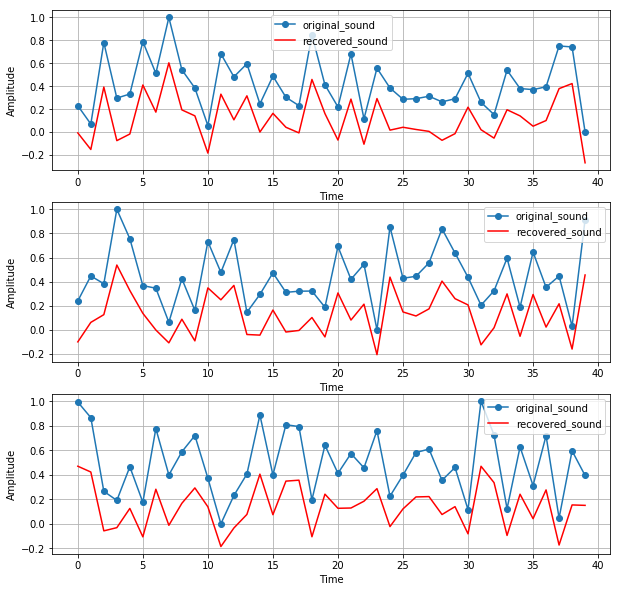

In [6]:
# Let's make some awesome plots 
# for the given test sound matrix: having three sound sources
fig = plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(original_sound[0,:], 'o-', label = 'original_sound')
plt.plot(recovered_sound[1,:], 'r-', label = 'recovered_sound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(312)
plt.plot(original_sound[1,:], 'o-', label = 'original_sound')
plt.plot(recovered_sound[0,:], 'r-', label = 'recovered_sound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(313)
plt.plot(original_sound[2,:], 'o-', label = 'original_sound')
plt.plot(recovered_sound[2,:], 'r-', label = 'recovered_sound')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.savefig('plot2.png', dpi = 100)


plt.show()


In [7]:

#U - source, A - mixer, W - separator, Y-mixed sund
sounds = scipy.io.loadmat('sounds.mat')

U = sounds['sounds'][:,0:25] # a matrix of five sound wave
A = np.random.rand(U.shape[0],U.shape[0])
#A = np.random.uniform(0,0.1, (U.shape[0]*U.shape[0])).reshape(U.shape[0], U.shape[0])
M = np.matmul(A, U) # Mixed Sound
W = np.random.rand(U.shape[0],U.shape[0])[:,0:25]
print(U.shape, A.shape, M.shape, W.shape)


#W = np.random.uniform(0,0.1, (U.shape[0]*U.shape[0])).reshape(U.shape[0], U.shape[0])

U12 = U[0:2,:].reshape(2, U.shape[1])
A12 = A[0:2,0:2].reshape(2,2)
M12 = np.matmul(A12,U12) #mixed sound
W12 = W[0:2,0:2].reshape(2,2)
print(U12.shape, A12.shape, M12.shape, W12.shape)

U123 = U[0:3,:].reshape(3, U.shape[1])
A123 = A[0:3,0:3].reshape(3,3)
M123 = np.matmul(A123,U123)#mixed sound
W123 = W[0:3,0:3].reshape(3,3)
print(U123.shape, A123.shape, M123.shape, W123.shape)


(5, 25) (5, 5) (5, 25) (5, 5)
(2, 25) (2, 2) (2, 25) (2, 2)
(3, 25) (3, 3) (3, 25) (3, 3)


In [8]:

# Taking two sound: first and second sound, from the source
original_sound12 = np.array(U12)
recovered_sound12 = grad(np.array(W12*0.1), np.array(M12), 0.01, 10000)



For aplha:0.01 iteration:10000 separator:[ 61.01289551 -15.94149006 -16.04590407  73.08254615]


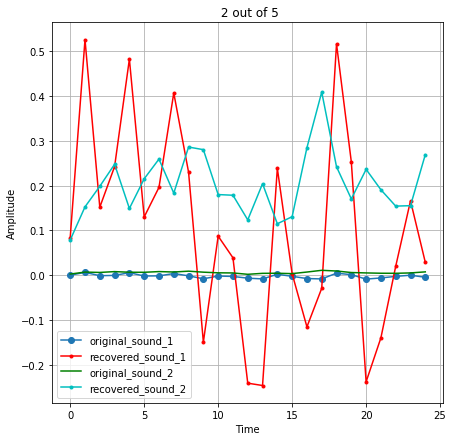

In [9]:
# Let's make some awesome plots 
# for the given test sound matrix: having three sound sources
fig = plt.figure(figsize=(7,7))

plt.plot(original_sound12[0,:], 'o-', label = 'original_sound_1')
plt.plot(recovered_sound12[0,:], 'r.-', label = 'recovered_sound_1')
plt.plot(original_sound12[1,:], 'g-', label = 'original_sound_2')
plt.plot(recovered_sound12[1,:], 'c.-', label = 'recovered_sound_2')
plt.legend()
plt.grid(True)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title(" 2 out of 5")
plt.grid(True)
plt.savefig('plot3.png', dpi = 100)
plt.show()

In [10]:
# Let's do the scaling of the recoered sound
recovered_sound12 = 0.025*recovered_sound12
original_sound12 = original_sound12

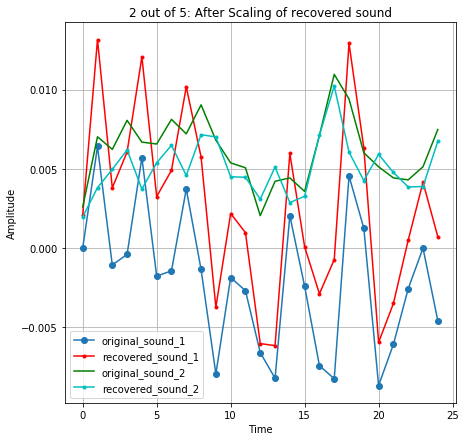

In [11]:
fig = plt.figure(figsize=(7,7))

plt.plot(original_sound12[0,:], 'o-', label = 'original_sound_1')
plt.plot(recovered_sound12[0,:], 'r.-', label = 'recovered_sound_1')
plt.plot(original_sound12[1,:], 'g-', label = 'original_sound_2')
plt.plot(recovered_sound12[1,:], 'c.-', label = 'recovered_sound_2')
plt.legend()
plt.grid(True)

plt.legend()
plt.title("2 out of 5: After Scaling of recovered sound")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.savefig('plot4.png', dpi = 100)

plt.show()

In [12]:
# Let's do with all five sounds at once and with 10000 iterations
original_sound = U
recovered_sound = grad(W*0.1, M, 0.01, 10000)


For aplha:0.01 iteration:10000 separator:[ 59.51657996  -4.10416892   9.18398776  -3.12125905  -4.73974952
  -4.09033742  75.87401976 -10.65848951 -13.95535896  -5.33010312
   9.30191562 -10.58244302  56.40514148 -32.76737534 -27.43221076
  -3.05140912 -13.98217857 -32.76173962  71.91621612 -22.6313849
  -4.74036155  -5.2608456  -27.53274375 -22.69372516  79.35417912]


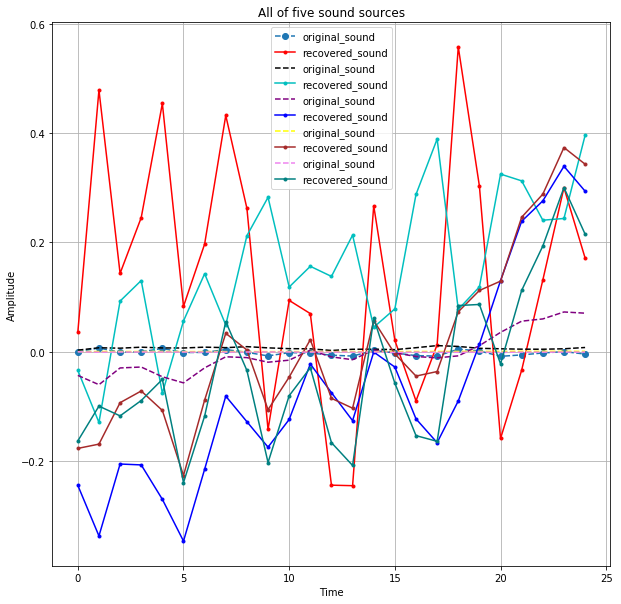

In [13]:
# Let's make some awesome plots 
# for the given test sound matrix: having three sound sources
fig = plt.figure(figsize=(10,10))

plt.plot(original_sound[0,:], 'o--', label = 'original_sound')
plt.plot(recovered_sound[0,:], 'r.-', label = 'recovered_sound')

plt.plot(original_sound[1,:], 'k--', label = 'original_sound')
plt.plot(recovered_sound[1,:], 'c.-', label = 'recovered_sound')

plt.plot(original_sound[2,:], '--', color = 'purple',label = 'original_sound')
plt.plot(recovered_sound[2,:], '.-', color = 'blue',label = 'recovered_sound')
  
plt.plot(original_sound[3,:],'--',  color = 'yellow',label = 'original_sound')
plt.plot(recovered_sound[3,:], '.-',color = 'brown', label ='recovered_sound')

plt.plot(original_sound[4,:], '--', color = 'violet',label = 'original_sound')
plt.plot(recovered_sound[4,:],  '.-',color ='teal',label = 'recovered_sound')

plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('All of five sound sources')
plt.savefig('plot5.png', dpi = 100)


plt.show()